In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [3]:
#stock data
tickers = ["APT.AX", "XRO.AX", "CPU.AX", "WTC.AX", "NXT.AX"]#, "ALU", "APX", "TNE", "PPH", "LNK"]
data = yf.download(tickers, start="2018-07-07", end="2020-07-07",
                   group_by="ticker")
data.head()


[*********************100%***********************]  5 of 5 completed


XRO.AX                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2018-07-09  45.500000  45.980000  45.040001  45.529999  45.529999   211942   
2018-07-10  45.439999  46.400002  45.080002  45.200001  45.200001   319632   
2018-07-11  45.000000  45.330002  44.360001  44.419998  44.419998   307383   
2018-07-12  44.599998  46.270000  44.599998  45.799999  45.799999  1797107   
2018-07-13  46.000000  46.869999  45.779999  46.290001  46.290001   367086   

           NXT.AX                     ...     CPU.AX                        \
             Open   High   Low Close  ...        Low      Close  Adj Close   
Date                                  ...                                    
2018-07-09   7.34  7.430  7.31  7.36  ...  17.900000  18.020000  17.115356   
2018-07-10   7.20  7.275  6.85  7.09  ...  17.920000  17.930000  17.029873   
2018-07-11   7.07  7.070  6.99  7.01  ...  17.940001  18.129999  17.219831   
2018-07-12   7.00  7.240  6.99  7.18  ...  18.129999  18.350000  17.428789   
2018-07-13   7.26  7.440  7.26  7.28  ...  18.120001  18.190001  17.276825   

                        WTC.AX                                                  
             Volume       Open       High        Low  Close  Adj Close  Volume  
Date                                                                            
2018-07-09  1793141  16.430000  16.540001  16.090000  16.26  16.209213  376818  
2018-07-10  1262050  16.450001  16.650000  16.309999  16.42  16.368715  427708  
2018-07-11   980803  16.410000  16.450001  16.129999  16.16  16.109524  543196  
2018-07-12  1150168  16.299999  17.135000  16.160000  17.09  17.036621  707886  
2018-07-13  1068356  17.000000  18.010000  17.000000  17.90  17.844090  744689  

[5 rows x 30 columns]

In [4]:
market = ["^AXJO"]
market_data = yf.download(market, start="2018-07-07", end="2020-07-07")
market_data = pd.DataFrame(market_data["Close"])
market_data

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2018-07-09,6286.000000
2018-07-10,6258.100098
2018-07-11,6215.600098
2018-07-12,6268.299805
2018-07-13,6268.399902
...,...
2020-06-30,5897.899902
2020-07-01,5934.399902
2020-07-02,6032.700195


In [5]:
a = pd.DataFrame(data["APT.AX"]["Close"]).rename(columns = {"Close": "APT"}) 
b = pd.DataFrame(data["XRO.AX"]["Close"]).rename(columns = {"Close": "XRO"})
c = pd.DataFrame(data["CPU.AX"]["Close"]).rename(columns = {"Close": "CPU"})
d = pd.DataFrame(data["WTC.AX"]["Close"]).rename(columns = {"Close": "WTC"})
e = pd.DataFrame(data["NXT.AX"]["Close"]).rename(columns = {"Close": "NXT"})
close_price = e.merge(d.merge(c.merge(a.merge(b, on = "Date"), on = "Date"), on = "Date"), on = "Date")
close_price

,NXT,WTC,CPU,APT,XRO
Date,,,,,
2018-07-09,7.36,16.260000,18.020000,10.250000,45.529999
2018-07-10,7.09,16.420000,17.930000,10.400000,45.200001
2018-07-11,7.01,16.160000,18.129999,10.400000,44.419998
2018-07-12,7.18,17.090000,18.350000,10.850000,45.799999
2018-07-13,7.28,17.900000,18.190001,10.980000,46.290001
...,...,...,...,...,...
2020-06-30,9.88,19.350000,13.250000,60.990002,90.110001
2020-07-01,10.68,18.549999,13.420000,62.240002,90.800003
2020-07-02,10.76,19.700001,13.480000,68.160004,91.800003


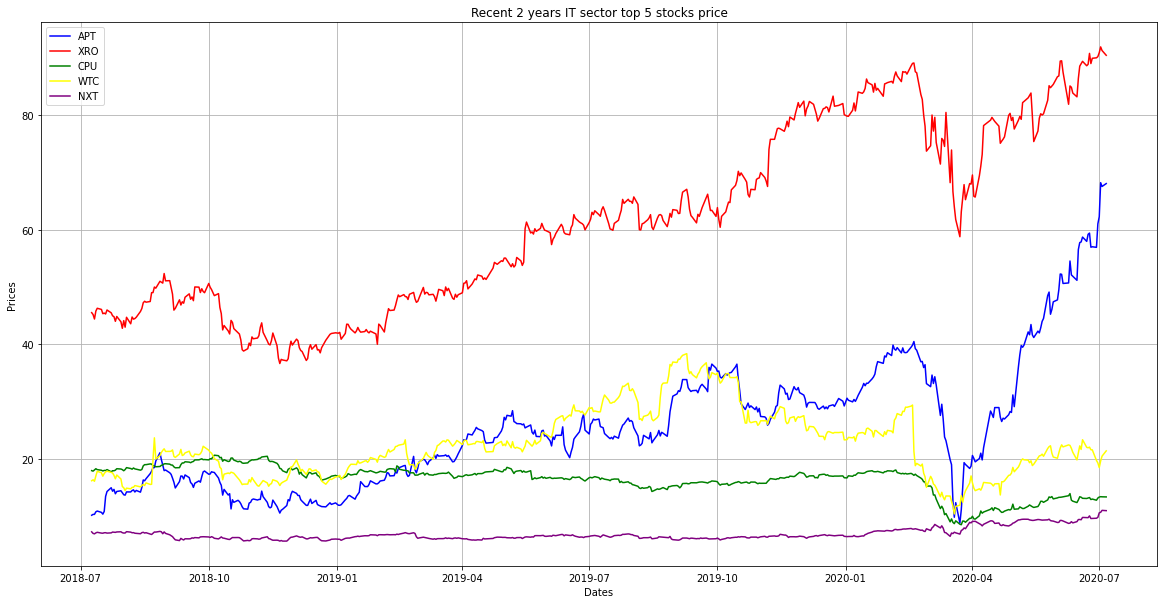

In [6]:
plt.figure(figsize=(20,10))

#market = plt.plot(market_data.index, market_data["Close"], color='orange', label="Market")
APT, = plt.plot(close_price.index, close_price["APT"], color='blue', label="APT")
XRO, = plt.plot(close_price.index, close_price["XRO"], color='red', label="XRO")
CPU, = plt.plot(close_price.index, close_price["CPU"], color='green', label="CPU")
WTC, = plt.plot(close_price.index, close_price["WTC"], color='yellow', label="WTC")
NXT, = plt.plot(close_price.index, close_price["NXT"], color='purple', label="NXT")
plt.legend(handles=[APT, XRO, CPU, WTC, NXT], loc="upper left")
plt.title("Recent 2 years IT sector top 5 stocks price")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.grid()

In [7]:
a = pd.DataFrame(data["APT.AX"]["Volume"]).rename(columns = {"Volume": "APT"}) 
b = pd.DataFrame(data["XRO.AX"]["Volume"]).rename(columns = {"Volume": "XRO"})
c = pd.DataFrame(data["CPU.AX"]["Volume"]).rename(columns = {"Volume": "CPU"})
d = pd.DataFrame(data["WTC.AX"]["Volume"]).rename(columns = {"Volume": "WTC"})
e = pd.DataFrame(data["NXT.AX"]["Volume"]).rename(columns = {"Volume": "NXT"})
volume = e.merge(d.merge(c.merge(a.merge(b, on = "Date"), on = "Date"), on = "Date"), on = "Date")
volume

,NXT,WTC,CPU,APT,XRO
Date,,,,,
2018-07-09,4582926,376818,1793141,1414006,211942
2018-07-10,5237142,427708,1262050,1894696,319632
2018-07-11,5533519,543196,980803,1282316,307383
2018-07-12,1657551,707886,1150168,1646554,1797107
2018-07-13,1380530,744689,1068356,2073182,367086
...,...,...,...,...,...
2020-06-30,1603298,2300425,1906000,3256850,658410
2020-07-01,2978568,3225628,1290114,2559434,341747
2020-07-02,3019651,3200767,1488163,2818784,332002


In [8]:
# weighted average return of IT sector (ask ryan on matrix operation & applying rolling window)
market_cap = close_price * volume
total = market_cap["APT"] + market_cap["XRO"] + market_cap["CPU"] + market_cap["WTC"] + market_cap["NXT"]

#market_cap
#total
weights =pd.DataFrame(market_cap["NXT"] / total).rename(columns = {0:"NXT"})
weights["WTC"] = market_cap["WTC"] / total
weights["CPU"] = market_cap["CPU"] / total
weights["APT"] = market_cap["APT"] / total
weights["XRO"] = market_cap["XRO"] / total
weights = weights[1:]

daily_return = close_price.pct_change(1).dropna()
#daily_return
weighted_ave_return = daily_return["NXT"]*weights["NXT"] + daily_return["WTC"]*weights["WTC"] + daily_return["CPU"]*weights["CPU"] + daily_return["APT"]*weights["APT"] + daily_return["XRO"]*weights["XRO"]
weighted_ave_return = weighted_ave_return.rolling(window = 20).mean().dropna()


#market return
market_return = market_data["Close"].pct_change(1).dropna().rolling(window = 20).mean().dropna()
#market_return
weighted_ave_return

Date
2018-08-06    0.008647
2018-08-07    0.009766
2018-08-08    0.010255
2018-08-09    0.008324
2018-08-10    0.007875
                ...   
2020-06-30    0.007566
2020-07-01    0.006815
2020-07-02    0.008084
2020-07-03    0.007913
2020-07-06    0.009364
Length: 486, dtype: float64

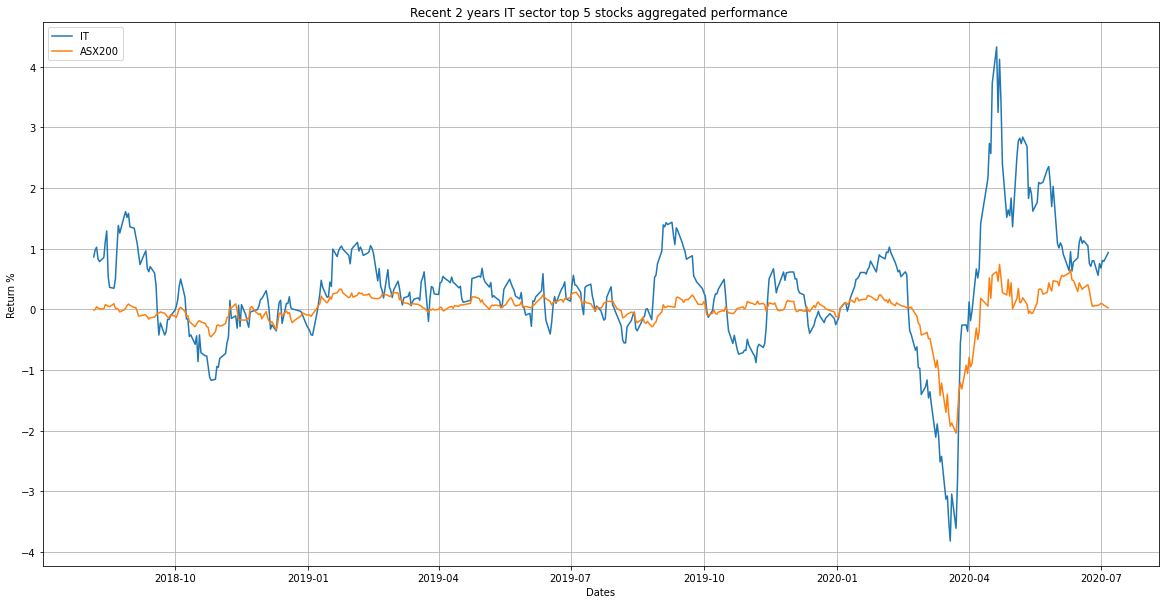

In [9]:
plt.figure(figsize=(20,10))
it, = plt.plot(weighted_ave_return.index, weighted_ave_return*100, label = "IT")
market, = plt.plot(market_return.index, market_return*100, label = "ASX200")
plt.title("Recent 2 years IT sector top 5 stocks aggregated performance ")
plt.legend(handles=[it, market], loc="upper left")
plt.xlabel("Dates")
plt.ylabel("Return %")
plt.grid()

In [10]:
#unemployment data (ask ryan why rename columns does not work)
unemployment = pd.read_excel("C:/Users/li116/OneDrive/Desktop/class/project/Mustard-Ferrets/abssheets/uemploy/6354001.xls",sheet_name = "Data1",header = 0, index_col = 0)[9:]

unemployment = pd.DataFrame(unemployment["Job Vacancies ;  Australia ;"]).dropna()
unemployment = unemployment.loc["2018":"2020"]
unemployment.columns = ["Australia unemployment"]
unemployment

,Australia unemployment
2018-02-15,215
2018-05-15,214.4
2018-08-15,231.3
2018-11-15,234.7
2019-02-15,234.7
2019-05-15,219.1
2019-08-15,226.3
2019-11-15,231.4
2020-02-15,229.5
2020-05-15,124.5


In [11]:
# unemployment merge weighted_ave_return dataset
merge=pd.merge(pd.DataFrame(weighted_ave_return*1000),unemployment, how='outer', left_index=True, right_index=True).rename(columns={0:"weighted_ave_return"})
merge = merge.fillna(0)
merge
#merge["Australia unemployment"]


,weighted_ave_return,Australia unemployment
2018-02-15,0.000000,215.0
2018-05-15,0.000000,214.4
2018-08-06,8.646902,0.0
2018-08-07,9.766151,0.0
2018-08-08,10.255499,0.0
...,...,...
2020-06-30,7.565546,0.0
2020-07-01,6.815063,0.0
2020-07-02,8.083768,0.0
2020-07-03,7.912959,0.0


In [12]:
max(merge["weighted_ave_return"])
max(merge["Australia unemployment"])

234.7

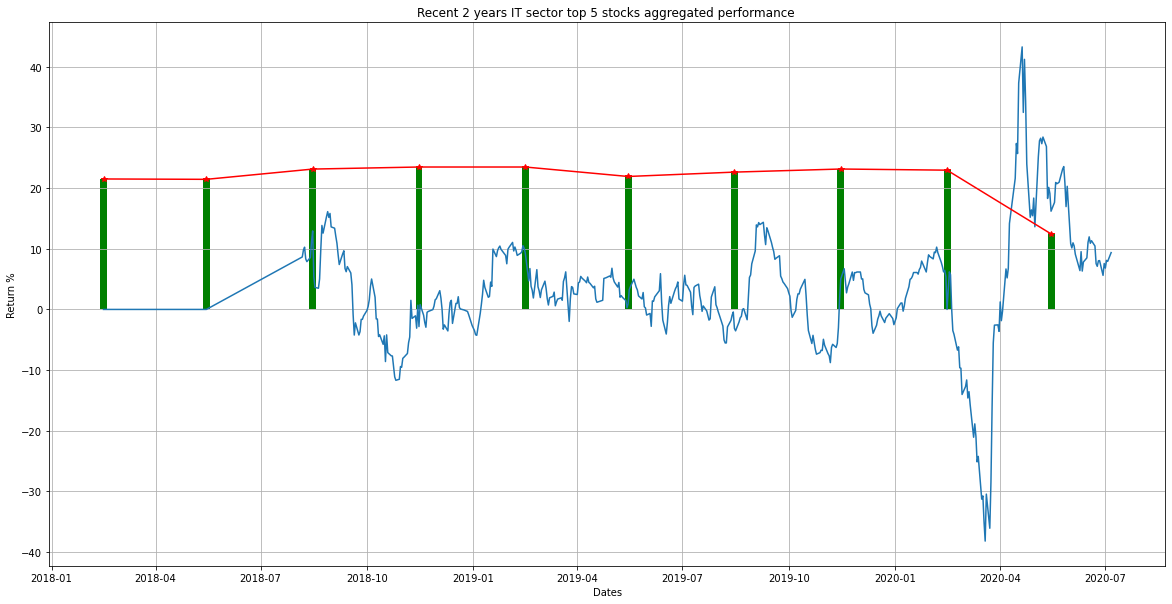

In [13]:
plt.figure(figsize=(20,10))
it, = plt.plot(merge.index, merge["weighted_ave_return"], label = "IT")
#market, = plt.plot(market_return.index, market_return*100, label = "ASX200")
year = merge.index
vacancies = merge["Australia unemployment"]
unemploy =plt.bar(year, vacancies/10, color="green", align="center", width = 6)
plt.title("Recent 2 years IT sector top 5 stocks aggregated performance ")
plt.plot(unemployment/10, color='red', marker = "*")
#plt.legend(handles=[it, market], loc="upper left")
plt.xlabel("Dates")
plt.ylabel("Return %")
plt.grid()

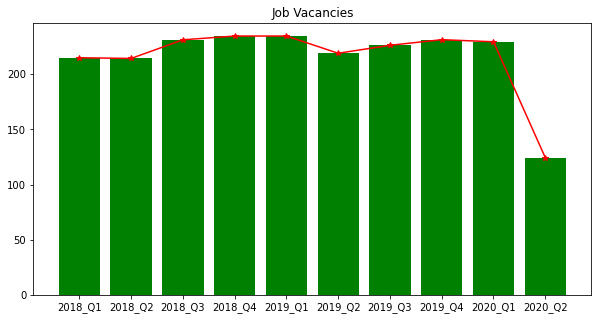

In [14]:
plt.figure(figsize=(10,5))
year = ["2018_Q1", "2018_Q2", "2018_Q3", "2018_Q4", "2019_Q1", "2019_Q2", "2019_Q3", "2019_Q4", "2020_Q1", "2020_Q2"]
vacancies = [215, 214.4, 231.3, 234.7, 234.7, 219.1, 226.3, 231.4, 229.5, 124.5]
#x_axis = np.arange(len(vacancies))
plt.bar(year, vacancies, color="green", align="center")
plt.title("Job Vacancies")
plt.plot(vacancies, color='red', marker = "*")

In [15]:
#DGP data
#unemployment data
GDP = pd.read_excel("C:/Users/li116/OneDrive/Desktop/class/project/Mustard-Ferrets/abssheets/gdpsheets/5206001_key_aggregates.xls",sheet_name = "Data1",header = 0, index_col = 0)[9:]
GDP
GDP = pd.DataFrame(GDP["Gross domestic product: Chain volume measures - Percentage changes ;"])
GDP = GDP.dropna().loc["2018":"2020"]
GDP

,Gross domestic product: Chain volume measures - Percentage changes ;
2018-03-01,0.8
2018-06-01,0.6
2018-09-01,0.4
2018-12-01,0.3
2019-03-01,0.4


In [16]:
#FX data (Australia main trading partners)
fx = pd.read_excel("C:/Users/li116/OneDrive/Desktop/class/project/Mustard-Ferrets/abssheets/fxrates/2018-current.xls",header = 1, index_col = 0)[9:]
fx = fx[["A$1=CNY", "A$1=JPY", "A$1=KRW", "A$1=USD", "A$1=INR", "A$1=NZD", "A$1=SDR", "A$1=TWD", "A$1=GBP", "A$1=MYR"]]

fx["A$1=CNY"] = fx["A$1=CNY"] / fx["A$1=CNY"][0]
fx["A$1=JPY"] = fx["A$1=JPY"] / fx["A$1=JPY"][0]
fx["A$1=KRW"] = fx["A$1=KRW"] / fx["A$1=KRW"][0]
fx["A$1=USD"] = fx["A$1=USD"] / fx["A$1=USD"][0]
fx["A$1=INR"] = fx["A$1=INR"] / fx["A$1=INR"][0]
fx["A$1=NZD"] = fx["A$1=NZD"] / fx["A$1=NZD"][0]
fx["A$1=SDR"] = fx["A$1=SDR"] / fx["A$1=SDR"][0]
fx["A$1=TWD"] = fx["A$1=TWD"] / fx["A$1=TWD"][0]
fx["A$1=GBP"] = fx["A$1=GBP"] / fx["A$1=GBP"][0]
fx["A$1=MYR"] = fx["A$1=MYR"] / fx["A$1=MYR"][0]

fx

,A$1=CNY,A$1=JPY,A$1=KRW,A$1=USD,A$1=INR,A$1=NZD,A$1=SDR,A$1=TWD,A$1=GBP,A$1=MYR
Title,,,,,,,,,,
2018-01-02,1,1,1,1,1,1,1,1,1,1
2018-01-03,0.997919,0.994,1.00094,0.99732,0.994591,1.00045,0.994548,0.99655,0.991033,0.995696
2018-01-04,1.00069,0.999321,1.00251,0.999745,0.996795,1.00118,0.998183,1,0.99931,0.996266
2018-01-05,0.999372,1.00408,1.00287,1.00255,0.996995,0.996006,1,1,0.99862,0.993101
2018-01-08,0.99892,1.00509,1.00537,1.00064,0.994391,0.992284,0.998546,0.996981,0.997413,0.989715
...,...,...,...,...,...,...,...,...,...,...
2020-06-25,0.95515,0.834145,0.994411,0.877249,1.04207,0.971678,0.903144,0.877102,0.95482,0.932276
2020-06-26,0.956956,0.834824,0.99238,0.878908,1.04107,0.970316,0.908777,0.87624,0.955682,0.934333
2020-06-29,0.955406,0.834031,0.991755,0.877759,1.04127,0.970679,0.90696,0.874946,0.958614,0.933036


Text(0.5, 1.0, 'FX rate witn top 10 Australia trading partners')

<Figure size 432x288 with 0 Axes>

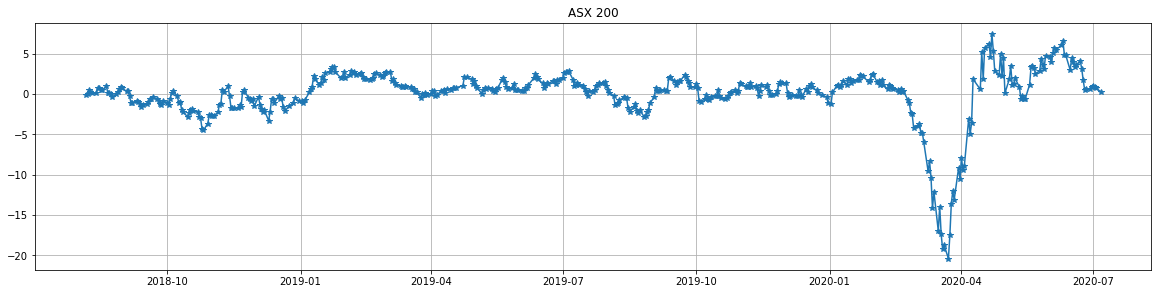

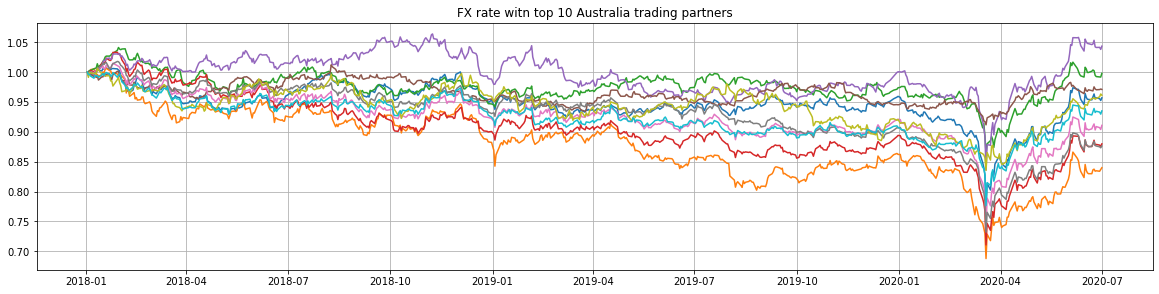

In [17]:

fig = plt.figure()

plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
plt.plot(market_return*1000, marker = "*")
plt.grid()
plt.title("ASX 200")

plt.figure(figsize=(20,10))
plt.subplot(2, 1, 2)
plt.plot(fx)
plt.grid()
plt.title("FX rate witn top 10 Australia trading partners")

In [18]:
## null hypothesis: the impact of the pandemic is the same to the return of AXS200 and IT sector
stats.ttest_ind(market_return, weighted_ave_return, equal_var=False)


Ttest_indResult(statistic=-7.005233083021705, pvalue=6.58295857553412e-12)

In [19]:
stats.ttest_ind(weighted_ave_return, market_return, equal_var=False)

Ttest_indResult(statistic=7.005233083021705, pvalue=6.58295857553412e-12)